## Problem 1
For the simple neural network example  

<img src="fig/nn_problem.png" alt="simple nn" width="600" >

Assume the weights $w_{11}^{(1)}=0.1$, $w_{21}^{(1)}=-0.3$, $w_{31}^{(1)}=-0.25$, $w_{12}^{(1)}=-0.2$, $w_{22}^{(1)}=0.1$, $w_{32}^{(1)}=0.6$, and $w_{11}^{(2)}=0.2$, $w_{12}^{(2)}=-0.7$, $w_{13}^{(2)}=-0.05$, $w_{21}^{(2)}=0.2$, $w_{22}^{(2)}=0.011$, $w_{23}^{(2)}=0.6$ and that the activation functions are the tanh. Compute the output $\hat{y}$ for $x=[-1,4]$. 



In [2]:
import numpy as np 


x = (np.array([[-1],[4]]))                                          # Input layer
print(f'Input layer:\n{x}')

# Define Layers
w1 = np.transpose(np.array([[0.1, -0.3, -0.25],[-0.2, 0.1, 0.6]]))  # Hidden layer 1
w2 = np.array([[0.2, -0.7, -0.05],[0.2, 0.011, 0.6]])               # Output layer

def forward(w1, w2 ,x):
    h1 = np.tanh(w1 @ x)
    return np.tanh(w2 @ h1)

y_hat = forward(w1,w2,x)

print(f'Output:\n{y_hat}')


Input layer:
[[-1]
 [ 4]]
Output:
[[-0.5482112]
 [ 0.4279859]]


## Problem 2
Compute the gradient of the cost function (L2) for the neural network (with its parameters) in Problem 1 with $x=[-1,4]$ and the target $y=[-0.3,0.5]$ by using   
a) Numerical differentiation  
b) Automatic differentiation using PyTorch (autograd)


In [3]:
# 3a, Numerical Differentiation

y = np.array([[-0.3],[0.5]]) # target

def loss(w1, w2, x, y):      # Calculate loss functon
    y_hat = forward(w1,w2,x)
    return 1/2 * np.linalg.norm(y_hat - y)**2

def numerical_differentiation(w1, w2, x, y, eps=1e-6):
    grad_w1 = np.zeros_like(w1) # Pre allocate
    grad_w2 = np.zeros_like(w2)

    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            w1_plus, w1_minus = w1.copy(), w1.copy()

            w1_plus[i,j]    += eps
            w1_minus[i,j]   -= eps
            grad_w1[i,j] = (loss(w1_plus, w2, x, y) - loss(w1_minus, w2, x, y)) / (2*eps)

    for i in range(w2.shape[0]):
        for j in range(w2.shape[1]):
            w2_plus, w2_minus = w2.copy(), w2.copy()

            w2_plus[i,j]    += eps
            w2_minus[i,j]   -= eps
            grad_w2[i,j] = (loss(w1, w2_plus, x, y) - loss(w1, w2_minus, x, y)) / (2*eps)

    return grad_w1, grad_w2

grad_w1, grad_w2 = numerical_differentiation(w1,w2,x,y)

print(f'Gradient wrt W1: \n{grad_w1}')
print(f'Gradient wrt W2: \n{grad_w2}')


Gradient wrt W1: 
[[ 0.02263563 -0.0905425 ]
 [-0.07672947  0.30691789]
 [ 0.0005261  -0.00210441]]
Gradient wrt W2: 
[[ 0.12436    -0.10492726 -0.1718903 ]
 [ 0.04213489 -0.03555081 -0.05823882]]


In [4]:
# 3b) Automatic differentiation using pytorch. 
import torch

x = torch.tensor([[-1.0],[4.0]], dtype=torch.float64)
y = torch.tensor([[-0.3],[0.5]], dtype=torch.float64)

w1 = torch.tensor(np.transpose([[0.1, -0.3, -0.25],[-0.2, 0.1, 0.6]]), requires_grad=True, dtype=torch.float64)
w2 = torch.tensor([[0.2, -0.7, -0.05],[0.2, 0.011, 0.6]], requires_grad=True, dtype=torch.float64)


# Output
h1 = torch.tanh(w1 @ x)
y_hat = torch.tanh(w2 @ h1)

# Loss
loss = 0.5*torch.norm(y_hat - y)**2

# Cost function
loss.backward()

print(f'Loss function: {loss}\n')
print(f'gradient wrt W1:\n{w1.grad.detach().numpy()}\n')
print(f'gradient wrt W2:\n{w2.grad.detach().numpy()}\n')



Loss function: 0.033397416383640716

gradient wrt W1:
[[ 0.02263563 -0.0905425 ]
 [-0.07672947  0.30691789]
 [ 0.0005261  -0.00210441]]

gradient wrt W2:
[[ 0.12436    -0.10492726 -0.1718903 ]
 [ 0.04213489 -0.03555081 -0.05823882]]



## Problem 3

Assume that data is given by $y = 0.2+0.4 \, x^2+0.3 \,x \, {\rm sin}(15 \,x)+0.05 \, {\rm cos}(50 \,x)$ for $0 \leq x \leq 1$. Adopt (see example from lectures):
* tolerance = 1e-7
* optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=1000,tolerance_change=tolerance)

The default is that PyTorch randomly selects initial guesses of the parameters. To prevent that write:
* torch.manual_seed(0)



<br>

__Compute the following:__

__a)__ Try to fit a neural network with four hidden layers and sigmoid as activation function. Assume 10 neurons in each hidden layer. How many epochs does it take for the nerual network to be fitted? Plot the nerual network against the original data.

__b)__ Extend the number of neurons in a) to 20.

<br>
Now switch optimizer to Adam as follows:

* optimizer = optim.Adam(model.parameters(), lr=0.01) 

and max epochs as:

* num_epochs = 20000

__c)__ Perform __a)__ but with Adam

__d)__ Perform __b)__ but with Adam

__e)__ Now allow different starting values. Try if you can get better results than in d) by running the code several times (you need to skip torch.manual_seed(0)).


Epoch [1000], Loss: 0.0021
Epoch [2000], Loss: 0.0014
Epoch [3000], Loss: 0.0013
Epoch [4000], Loss: 0.0013
Epoch [5000], Loss: 0.0012
Epoch [6000], Loss: 0.0012
Epoch [7000], Loss: 0.0011
Epoch [8000], Loss: 0.0010
Epoch [9000], Loss: 0.0010
Epoch [10000], Loss: 0.0009
Epoch [11000], Loss: 0.0009
Epoch [12000], Loss: 0.0009
Epoch [13000], Loss: 0.0009
Epoch [14000], Loss: 0.0009
Epoch [15000], Loss: 0.0008
Epoch [16000], Loss: 0.0007
Epoch [17000], Loss: 0.0006
Epoch [18000], Loss: 0.0005
Epoch [19000], Loss: 0.0005
Epoch [20000], Loss: 0.0005


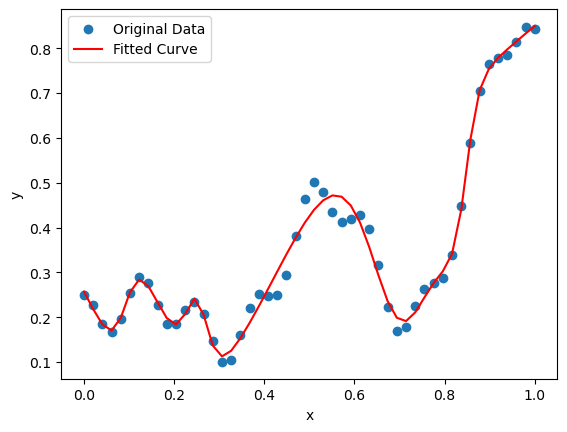

In [125]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt

# Generate some noisy sine wave data
np.random.seed(0) # for getting out the same random variables every time (reproducability)
x = np.linspace(0, 1)
y = y = 0.2 + 0.4*x**2 + 0.3*x*np.sin(15*x) + 0.05*np.cos(50*x)

#x: input data
#y: output data
#lambda_l1: LASSO regularization parameter
#optim_alg: choice of optimization algorithm 'LBFGS', 'Adam','SGD'
def my_nn(x,y,lambda_l1,optim_alg):
    # Convert the data to PyTorch tensors
    x_tensor = torch.from_numpy(x).float().unsqueeze(1)
    y_tensor = torch.from_numpy(y).float().unsqueeze(1)

    # Define the neural network model
    class SinNet(nn.Module):
        def __init__(self):
            super(SinNet, self).__init__()
            self.fc1 = nn.Linear(1, 10)   
            self.fc2 = nn.Linear(10, 10)
            self.fc3 = nn.Linear(10, 10)
            self.fc5 = nn.Linear(10, 1)
            self.sigmoid = nn.Sigmoid()
            self.tanh = nn.Tanh()

        def forward(self, x):
            x = self.sigmoid(self.fc1(x))
            x = self.sigmoid(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            x = self.fc5(x)
            return x

    # Set a random seed for reproducibility, the same initial guess
    torch.manual_seed(0)
    
    # Create an instance of the SinNet model
    model = SinNet()  

    # Define the loss function
    criterion = nn.MSELoss()

    # Create a function for LBFGS closure

    def closure():
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
    # Calculate the L1 regularization term
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, p=1)
    
        # Add the L1 regularization term to the loss
        loss += lambda_l1 * l1_regularization
        loss.backward()
        return loss
    def closure_wrapper():
            loss = closure()
            return loss
    
    
    prev_loss = float('inf')  # Initialize with a large value
    tolerance = 1.e-7
    max_no_epoch=20000

    if optim_alg=='LBFGS':
        optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=1000,tolerance_change=tolerance)
    #alternatively:
    elif optim_alg=='Adam': 
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optim_alg=='SGD': 
        optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

    


    # Training loop
    for epoch in range(max_no_epoch):
        
        optimizer.step(closure_wrapper)

    # Print the loss every 10th epoch
        if optim_alg == 'LBFGS':
            if (epoch + 1) % 1 == 0:
                print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")
        
        if optim_alg == 'Adam':
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")

        loss = closure()
    
        loss_change = prev_loss - loss.item()
        prev_loss = loss.item()
    
        # Check if the optimizer has converged (you can modify this condition)
    
        if optim_alg=='LBFGS':
            if loss_change < tolerance:
                print(f"Optimizer has converged. Stopping training.")
                break


    # Plot the original data and the fitted curve
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, model(x_tensor).detach().numpy(), 'r', label='Fitted Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    return model

optim_alg='Adam'  #'LBFGS'
# Define the L1 regularization strength (lambda)
lambda_l1 = 0  # You can adjust this value
mymodel=my_nn(x,y,lambda_l1,optim_alg)



## Problem 4
Use the code from the example above but replace it with the following data from fatigue experiments: 
$\sigma=[ 100,110,115,120,125,130,135, 140, 150, 160,  170,  180 ]$ MPa and
$N_f= [100, 100, 1.2, 1.0, 0.75, 0.6, 0.5, 0.4, 0.3, 0.25, 0.22, 0.2 ] \cdot 10^6$  

a) Try to fit a NN to the experimental data. Assume 3 hidden layers with 10 neurons in the first, 20 in the second and 10 in the last. Since the fit depends on the starting values, use:

* torch.manual_seed(2) 

* Adam optimizer with max 20000 epochs. 


b) Try to plot the extrapolated curve for larger and smaller $N_f$ than what you trained the NN for.

c) Now add a random noise/uncertainty on the mesasured $N_f$. Assume that it can be obtained by multiplying with np.random.normal(1., 0.1, 12), i.e. normal distribution with standard deviation: 0.1 and center of distribution: 1. To get the 
same random numbers all the time use: np.random.seed(1) before you write np.random.normal(1., 0.1, 12). Increase the size of the NN by using 3 hidden layers with 20 neurons in the first, 40 in the second and 20 in the last.

d) Now try to add L1 regularization (try different values) and see how it affects the results from c).



Epoch [1000], Loss: 2658.9783
Epoch [2000], Loss: 611.0507
Epoch [3000], Loss: 558.9289
Epoch [4000], Loss: 558.8542
Epoch [5000], Loss: 558.8542
Epoch [6000], Loss: 558.8542
Epoch [7000], Loss: 558.8542
Epoch [8000], Loss: 558.8542
Epoch [9000], Loss: 558.8542
Epoch [10000], Loss: 558.8542
Epoch [11000], Loss: 558.8542
Epoch [12000], Loss: 558.8542
Epoch [13000], Loss: 558.8542
Epoch [14000], Loss: 558.8542
Epoch [15000], Loss: 558.8542
Epoch [16000], Loss: 558.8542
Epoch [17000], Loss: 5.5702
Epoch [18000], Loss: 4.5466
Epoch [19000], Loss: 4.4567
Epoch [20000], Loss: 4.4116


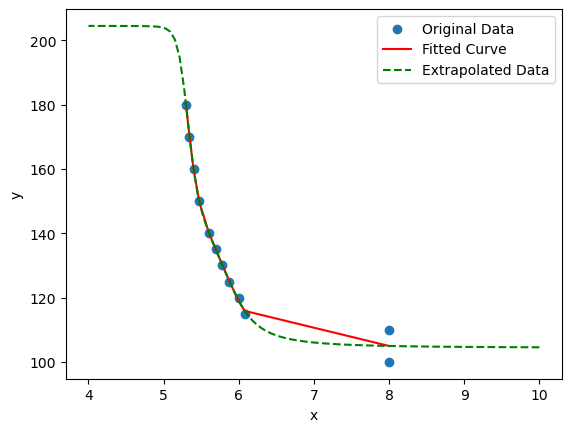

In [128]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt

sig = np.array([100, 110, 115, 120, 125, 130, 135, 140, 150, 160 ,170 ,180])
Nf  = np.log10(np.array([100, 100, 1.2, 1.0, 0.75, 0.6, 0.5, 0.4, 0.3, 0.25, 0.22, 0.2])*1e6)

#x: input data
#y: output data
#lambda_l1: LASSO regularization parameter
#optim_alg: choice of optimization algorithm 'LBFGS', 'Adam','SGD'
def my_nn(x,y,lambda_l1,optim_alg):
    # Convert the data to PyTorch tensors
    x_tensor = torch.from_numpy(x).float().unsqueeze(1)
    y_tensor = torch.from_numpy(y).float().unsqueeze(1)

    # Define the neural network model
    class SinNet(nn.Module):
        def __init__(self):
            super(SinNet, self).__init__()
            self.fc1 = nn.Linear(1, 10)   
            self.fc2 = nn.Linear(10, 20)
            self.fc3 = nn.Linear(20, 10)
            self.fc4 = nn.Linear(10, 1)
            self.sigmoid = nn.Sigmoid()
            self.tanh = nn.Tanh()

        def forward(self, x):
            x = self.sigmoid(self.fc1(x))
            x = self.sigmoid(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            x = self.fc4(x)
            return x

    # Set a random seed for reproducibility, the same initial guess
    torch.manual_seed(2)
    
    # Create an instance of the SinNet model
    model = SinNet()  

    # Define the loss function
    criterion = nn.MSELoss()

    # Create a function for LBFGS closure

    def closure():
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
    # Calculate the L1 regularization term
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, p=1)
    
        # Add the L1 regularization term to the loss
        loss += lambda_l1 * l1_regularization
        loss.backward()
        return loss
    def closure_wrapper():
            loss = closure()
            return loss
    
    
    prev_loss = float('inf')  # Initialize with a large value
    tolerance = 1.e-7
    max_no_epoch=20000

    if optim_alg=='LBFGS':
        optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=1000,tolerance_change=tolerance)
    #alternatively:
    elif optim_alg=='Adam': 
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optim_alg=='SGD': 
        optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

    

    # Training loop
    for epoch in range(max_no_epoch):
        
        optimizer.step(closure_wrapper)

    # Print the loss every 10th epoch
        if optim_alg == 'LBFGS':
            if (epoch + 1) % 1 == 0:
                print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")
        
        if optim_alg == 'Adam':
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")

        loss = closure()
    
        loss_change = prev_loss - loss.item()
        prev_loss = loss.item()
    
        # Check if the optimizer has converged (you can modify this condition)
    
        if optim_alg=='LBFGS':
            if loss_change < tolerance:
                print(f"Optimizer has converged. Stopping training.")
                break



    # Plot the original data and the fitted curve
    x_exp = torch.from_numpy(np.linspace(10,4,100)).float().unsqueeze(1)
    
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, model(x_tensor).detach().numpy(), 'r', label='Fitted Curve')
    plt.plot(x_exp, model(x_exp).detach().numpy(), '--g', label='Extrapolated Data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    return model


optim_alg='Adam'  #'LBFGS'
# Define the L1 regularization strength (lambda)
lambda_l1 = 0  # You can adjust this value
mymodel=my_nn(Nf,sig,lambda_l1,optim_alg)



## Problem  5

Train a NN to the rubber material data (see problems Optimization/regression). Train the NN by adopting a cross-validation strategy. Withhold approx 10% of the data, validate against 10% of data, and train with 80% of the data. Randomly choose 10 different cross-validation sets.  

After training pick the parameters that gives the best fit to the validation data. Plot the response and compare it to the rubber data.

Assume 3 hidden layers with 10 neurons in the first, 20 in the second and 10 in the last. Since the fit depends on the starting values, use:

* torch.manual_seed(0) 

* Adam optimizer with max 2000 epochs. 



## Problem 6
Assume as mass spring system with stiffnesses $k1=5$, $k2=10$ [N/mm] and masses $m1=1$,  $m2=2$ [kg].



<img src="fig/spring_mass_nn.png" alt="simple nn" width="300" >

a) Compute $x1(t)$ and $x2(t)$ for $0 \leq t \leq 10$ s by using ODE solver and the initial conditions $x1=0.3$ mm, $v1=1$ mm/s, $x2=0.1$ mm, $v2=-1$ mm/s. 

b) Now produce data for training a NN by adopting 100 different initial conditions

y0 = -5. + 10. * np.random.random((100, 4))  

Train a NN based on these data and use the NN to predict the response $x1(t)$ and $x2(t)$.

## Problem 7

For the Ovarian cancer example (see Problems SVD) there is data for 216 patient (whereof 121 have ovarian cancer). Train a simple NN using the cross-entropy loss. Train against 80% of the data and test your model against the remaining 20%. 